In [1]:

# Requirements: Matplotlib, Numpy, functions_util.py, index.py#, fitting_functions_ZNE.py, h5py

import os

#Move the directory back to Duke_Data
#Check if the current directory is Duke_Data
if os.getcwd().split('/')[-1] != 'DUKE_ANALOG_ZNE_DATA':
    #os.chdir('Duke_Data')
    os.chdir('../')
    #print(os.getcwd().split('/')[-1])
    #pass
else:
    pass
#print(os.getcwd())
from scripts.index import print_index, get_experiment, index_folder
from functions_util import cetina_thermal_exp, cetina_envelope_exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import numpy as np
import h5py
from fitting_functions_ZNE import linear_ZNE, third_no_first_ZNE


def fit(function, x_axis, y_axis, return_cov=False, p0=[.05,2000000], weights=None):
    # Fit the data to the function
    popt, pcov = curve_fit(function, x_axis, y_axis, p0=p0, sigma=weights, absolute_sigma=True, maxfev=10000)
    
    if return_cov:
        return popt, pcov
    return popt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# import all the useful lib in python
from matplotlib import artist as art
%matplotlib inline
import scipy as sp
# import pandas as pd
import pathlib
import os
import datetime as dt
import glob
from IPython.display import clear_output
from numpy.fft import fft, ifft

from h5analysis import *
from qsim_functions import*


In [3]:

#pairs = [(11,12), (12,13),(13,14)]
#bases = ['x', 'y', 'z']
#pairs_names = [265, 259, 266]
# basis_names = [268, 271, 269]
# foldername = 'Population_4_tw0'
# pairs_names = [str(name) for name in pairs_names]
# qubits = [11,12,13,14]
# shots = 150
foldername = 'Population_dense'
#bases = ['x0', 'y0','x1','y1']
bases = ['x0', 'x1', 'y0', 'y1']
qubits = [11,12,13,14]
basis_names = [368, 369, 370, 371] 
shots = 600



# for name_index in range(len(pairs_names)):
#     name = pairs_names[name_index]
#     if '000563' in pairs_names:
#         pass
#     else:
#         name = '000563' + name
#         pairs_names[name_index] = name
basis_names = [str(name) for name in basis_names]
for name_index in range(len(basis_names)):
    name = basis_names[name_index]
    if '000563' in basis_names:
        pass
    else:
        name = '000563' + name
        basis_names[name_index] = name
full_data_folder_path = './data/' + foldername + '/'


In [4]:
COUNTS_THRESHOLD = 1


In [5]:
# leakage_matrix = np.zeros((30, len(pairs_names)))
# flopping_matrix = np.zeros((30, len(pairs_names)))
# flopping_std_matrix = np.zeros((30, len(pairs_names)))
# times = None


# print(os.getcwd())
# for file_id_index in range(len(pairs_names)):
#     file_id = pairs_names[file_id_index]
#     pair = pairs[file_id_index]
#     #pair = names[0]
#     file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
#     archive = file['archive']
#     dataset = file['datasets']
#     x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
#     times = np.array(x_vals)
#     print(times)
#     raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
#     counts = np.asarray(raw_counts)
#     print(counts.shape)
#     measurements = np.zeros((2, shots, 30))
#     for pair_index in range(len(pair)):
#         qubit = pair[pair_index]
#         measurements[pair_index,:,:] = 1 < counts[qubit,:,:]
#         #print(measurements)
#     #Convert the measurements to bitstrings. Convert to string, then append the like indices
#     counts_bitstrings = np.zeros((shots, 30), dtype='<U5')
#     expectations = np.zeros((shots, 30))
#     for i in range(shots):
#         for j in range(30):
#             expectation = ((measurements[0,i,j]*2-1) - (measurements[1,i,j]*2-1))/2
#             bitstring = str(int(measurements[0,i,j])) + str(int(measurements[1,i,j]))
#             #print(bitstring)
#             counts_bitstrings[i,j] = bitstring
#             expectations[i,j] = expectation
#     #average expectations across the 150 axis:
#     expectations_avg = np.mean(expectations, axis=0)
#     #Convert counts_bitstrings to a dictionary of counts
#     print(counts_bitstrings)
#     counts_array  = np.zeros((30,), dtype=dict)
#     for i in range(30):
#         counts_array[i] = {}
#         for j in range(shots):
#             if counts_bitstrings[j,i] in counts_array[i]:
#                 counts_array[i][counts_bitstrings[j,i]] += 1
#             else:
#                 counts_array[i][counts_bitstrings[j,i]] = 1
                
#     leakage = np.zeros((30,))
#     for i in range(30):
#         if '00' in counts_array[i]:
#             leakage[i] = counts_array[i]['00']/shots
#         if '11' in counts_array[i]:
#             leakage[i] += counts_array[i]['11']/shots
#     leakage_conv = np.zeros((30,))
#     for i in range(30):
#         leakage_conv[i] = np.mean(leakage[i:i+4])
#     leakage_matrix[:,file_id_index] = leakage_conv
#     flopping_matrix[:,file_id_index] = expectations_avg
#     flopping_std = np.std(expectations, axis=0)
#     flopping_std_matrix[:,file_id_index] = flopping_std
    
# #print(counts_array)

In [6]:
# cmap = cm.get_cmap('viridis')
# fig = plt.figure()
    
# def exp_fit(x, b, c):
#     return np.exp(-b*x)*np.cos(2*c*x)
# gammas = np.zeros((len(pairs_names),))
# for name_index in range(len(pairs_names)):
#     popt, pcov = curve_fit(exp_fit, times, flopping_matrix[:,name_index], p0=[0.05, 2*np.pi])
#     gammas[name_index] = popt[0]
#     color = cmap(name_index/len(pairs_names))
#     plt.plot(times, 1-leakage_matrix[:,name_index], label = pairs[name_index], color=color)
#     plt.plot(times, -1+leakage_matrix[:,name_index], color=color)
#     print(popt[1])
#     plt.errorbar(times, flopping_matrix[:,name_index], yerr = flopping_std_matrix[:,name_index]/np.sqrt(150), color=color)
# print(gammas)



# #make it bigger:
# fig.set_size_inches(10, 6)
# plt.legend()

In [7]:
shots = 600
measurement_data = np.zeros((30, len(basis_names)), dtype=dict)
#flopping_matrix = np.zeros((30, len(pairs_names)))
#flopping_std_matrix = np.zeros((30, len(pairs_names)))
#times = None
times_start = None
times_end = None
all_good_strings = ['0000', '1111']#, '0001', '0010', '0100', '1000', '1110', '1101', '1011', '0111']
expectations_matrix = np.zeros((30,len(basis_names)))
qubit_0_magnetization = np.zeros((30,len(basis_names)))
leakage_factor = np.zeros((30,len(basis_names)))

print(os.getcwd())
for file_id_index in range(len(basis_names)):
    
    file_id = basis_names[file_id_index]
    axis = bases[file_id_index]
    #pair = names[0]
    file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
    archive = file['archive']
    dataset = file['datasets']
    x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
    times = np.array(x_vals)
    if file_id_index == 0:
        times_start = times
    if file_id_index == 3:
        times_end = times
    #print(times)
    raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
    counts = np.asarray(raw_counts)
    #print(counts.shape)
    measurements = np.zeros((len(qubits), shots, 30))
    for qubit_index in range(len(qubits)):
        qubit = qubits[qubit_index]
        #qubit = pair[pair_index]
        measurements[qubit_index,:,:] = 1 < counts[qubit,:,:]
        #print(measurements)
    #Convert the measurements to bitstrings. Convert to string, then append the like indices
    counts_bitstrings = np.zeros((shots, 30), dtype='<U5')
    for i in range(shots):
        for j in range(30):
            bitstring = [str(int(measurements[qubit_index,i,j])) for qubit_index in range(len(qubits))]
            bitstring = "".join(bitstring)
            
            #print(measurements[:,i,j])
            #print(bitstring)
            #str(int(measurements[0,i,j])) + str(int(measurements[1,i,j]))
            #print(bitstring)
            counts_bitstrings[i,j] = bitstring
    counts_dicts = np.zeros(30, dtype=dict)
    for j in range(30):
        magnetization = 0
        for shot_index in range(shots):
            magnetization += measurements[0, shot_index, j]*2 - 1
        qubit_0_magnetization[j,file_id_index] = magnetization/shots
        temp_dict = {}#
        for string in all_good_strings:
            temp_dict[string] = 0
        #{'0000':0, '1111':0}
        for i in range(shots):
            if counts_bitstrings[i,j] in temp_dict:
                temp_dict[counts_bitstrings[i,j]] += 1/shots
            else:
                temp_dict[counts_bitstrings[i,j]] = 1/shots
        counts_dicts[j] = temp_dict
        expectation = 0
        for key in temp_dict.keys():
            if key not in all_good_strings:
                leakage_factor[j,file_id_index] += temp_dict[key]/shots
            #count the number of zeros. If it is even, add the value. If it is odd, subtract the value
            num_zeros = key.count('0')
            if num_zeros % 2 == 0:
                expectation += temp_dict[key]
            else:
                expectation -= temp_dict[key]
        expectations_matrix[j,file_id_index] = expectation
    measurement_data[:,file_id_index] = counts_dicts
    

    
#print(counts_array)

/Users/thomassteckmann/Duke_Analog_ZNE_data


In [8]:
print(measurement_data[:,2])

[{'0000': 0.1650000000000001, '1111': 0.2083333333333337, '1000': 0.05499999999999996, '0101': 0.028333333333333335, '0001': 0.07666666666666659, '1011': 0.03666666666666666, '0010': 0.06666666666666661, '1100': 0.025, '1110': 0.06999999999999994, '1101': 0.043333333333333314, '0110': 0.04499999999999998, '1010': 0.018333333333333333, '0100': 0.04999999999999997, '0111': 0.030000000000000002, '1001': 0.02666666666666667, '0011': 0.05499999999999996}
 {'0000': 0.15, '1111': 0.19166666666666693, '0111': 0.034999999999999996, '1001': 0.02, '1000': 0.08666666666666657, '1010': 0.03333333333333333, '1011': 0.04499999999999998, '1110': 0.07999999999999992, '0100': 0.06833333333333327, '1100': 0.03999999999999999, '0110': 0.04666666666666664, '0010': 0.05166666666666663, '0001': 0.03999999999999999, '1101': 0.04999999999999997, '0011': 0.03666666666666666, '0101': 0.025}
 {'0000': 0.13166666666666654, '1111': 0.17666666666666683, '1100': 0.03833333333333332, '1011': 0.048333333333333305, '100

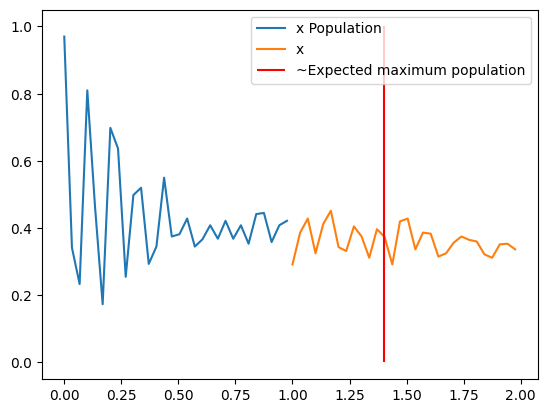

In [9]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
comb_x_pop = np.concatenate((Xpops, Ypops))

#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_start, Xpops, label = 'x Population')
plt.plot(times_end + 1, Ypops, label = 'x')
plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')
plt.legend()

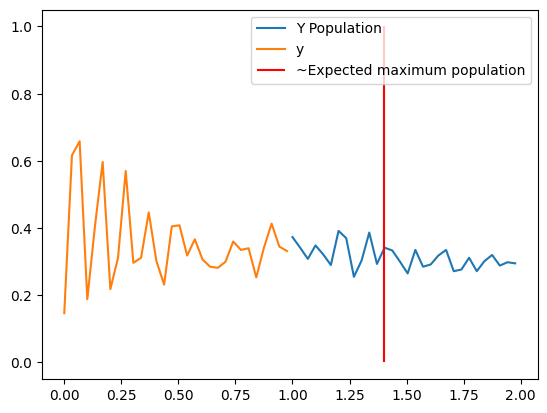

In [10]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,2][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,3][string] for string in all_good_strings]) for i in range(30)]
comb_y_pop = np.concatenate((Ypops,Xpops))
times_comb = np.concatenate((times_start, times_end+1))
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
#Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.plot(times_end+1, Xpops, label = 'Y Population')
plt.plot(times_start, Ypops, label = 'y')
plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')
plt.legend()

(30, 4)


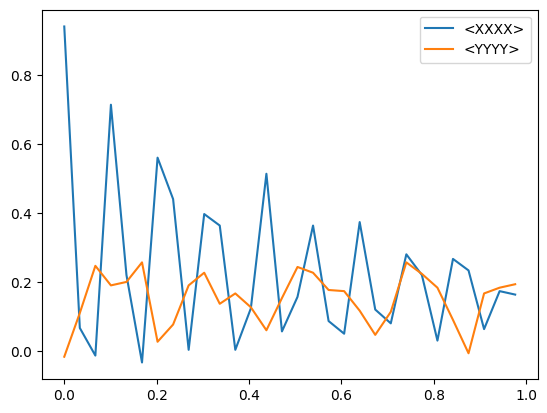

In [11]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
print(expectations_matrix.shape)
plt.plot(times, expectations_matrix[:,0], label = '<XXXX>')
plt.plot(times, expectations_matrix[:,1], label = '<YYYY>')
plt.legend()

In [12]:
#combined x_pop


In [17]:
import numpy as np
from numpy import kron
#import expm
from scipy.linalg import expm
import matplotlib.pyplot as plt

Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
YYI = kron(kron(Y, Y), np.eye(2))
XXI = kron(kron(X, X), np.eye(2))
XIX = kron(kron(X, np.eye(2)), X)
IXX = kron(kron(np.eye(2), X), X)
YIY = kron(kron(Y, np.eye(2)), Y)
IYY = kron(kron(np.eye(2), Y), Y)
XXII = kron(kron(kron(X, X), np.eye(2)), np.eye(2))
XIXI = kron(kron(kron(X, np.eye(2)), X), np.eye(2))
IXXI = kron(kron(kron(np.eye(2), X), X), np.eye(2))
IXIX = kron(kron(kron(np.eye(2), X), np.eye(2)), X)
IIXX = kron(kron(kron(np.eye(2), np.eye(2)), X), X)
XIIX = kron(kron(kron(X, np.eye(2)), np.eye(2)), X)
ZIII = kron(kron(kron(Z, np.eye(2)), np.eye(2)), np.eye(2))
IZII = kron(kron(kron(np.eye(2), Z), np.eye(2)), np.eye(2))
IIZI = kron(kron(kron(np.eye(2), np.eye(2)), Z), np.eye(2))
IIIZ = kron(kron(kron(np.eye(2), np.eye(2)), np.eye(2)), Z)

XIII = kron(kron(kron(X, np.eye(2)), np.eye(2)), np.eye(2))
YIII = kron(kron(kron(Y, np.eye(2)), np.eye(2)), np.eye(2))

XXXX = kron(kron(kron(X, X), X), X)
YYYY = kron(kron(kron(Y, Y), Y), Y)


#IZ = kron(np.eye(2), Z)

plus = np.array([[1], [1]]) / np.sqrt(2)
minus = np.array([[1], [-1]]) / np.sqrt(2)
up = np.array([[1], [0]])
down = np.array([[0], [1]])
plusY = np.array([[1], [1j]]) / np.sqrt(2)
minusY = np.array([[1], [-1j]]) / np.sqrt(2)


plusx4 = np.kron(np.kron(plus, plus), np.kron(plus, plus))
minusx4 = np.kron(np.kron(minus, minus), np.kron(minus, minus))
upx4 = np.kron(np.kron(up, up), np.kron(up, up))
downx4 = np.kron(np.kron(down, down), np.kron(down, down))
plusYx4 = np.kron(np.kron(plusY, plusY), np.kron(plusY, plusY))
minusYx4 = np.kron(np.kron(minusY, minusY), np.kron(minusY, minusY))


J = 1.48

upProj = upx4 @ upx4.conj().T
downProj = downx4 @ downx4.conj().T

Xproj = plusx4 @ plusx4.conj().T + minusx4 @ minusx4.conj().T
Yproj = plusYx4 @ plusYx4.conj().T + minusYx4 @ minusYx4.conj().T
h = 9*J

HTFIM = J*(XXII +IXXI+ IIXX + 1/np.e*(XIXI + IXIX) + 1/np.e**2*(XIIX)) + h*(ZIII + IZII + IIZI + IIIZ)
Uttfim = lambda t: expm(-1j * t * HTFIM)

#TFIM_rotation = lambda t: expm(1j*t*h/2*0*(ZII + IIZ + IZI))
#TFIM_rotation = lambda t: expm(1j*t*h*(ZII + IIZ + IZI))

#RY = expm(1j*np.pi/4 * (YII + IYI + IIY))



times_sim = np.linspace(0, 2, 1000)
times_sim = np.concatenate((times, times_sim))
times_sim.sort()
statesTFIM = [Uttfim(t) @ minusx4 for t in times_sim]



resultsTFIM_single_x = np.array([state.conj().T @ XIII @ state for state in statesTFIM])
resultsTFIM_single_y = np.array([state.conj().T @ YIII @ state for state in statesTFIM])

resultsTFIM_polarization_x = np.array([state.conj().T @ Xproj @ state for state in statesTFIM])
resultsTFIM_polarization_y = np.array([state.conj().T @ Yproj @ state for state in statesTFIM])

resultsTFIM_XXXX = np.array([state.conj().T @ XXXX @ state for state in statesTFIM])
resultsTFIM_YYYY = np.array([state.conj().T @ YYYY @ state for state in statesTFIM])


#print(np.array(resultsXY))

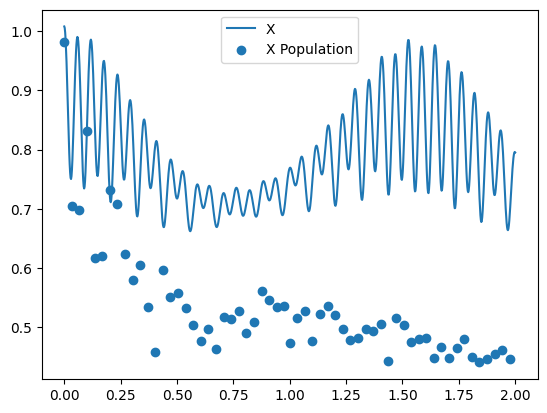

In [18]:
plt.plot(times_sim, np.sqrt(resultsTFIM_polarization_x[:,0,0]**2 + resultsTFIM_polarization_y[:,0,0]**2), label='X')
#plt.plot(times_sim, , label='Y')
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
Zpops = [measurement_data[i,2]['0000'] + measurement_data[i,2]['1111'] for i in range(30)]
plt.scatter(times_comb, np.sqrt(comb_x_pop**2 + comb_y_pop**2), label = 'X Population')
#plt.scatter(times_comb, , label = 'y')
plt.legend()
plt.legend()

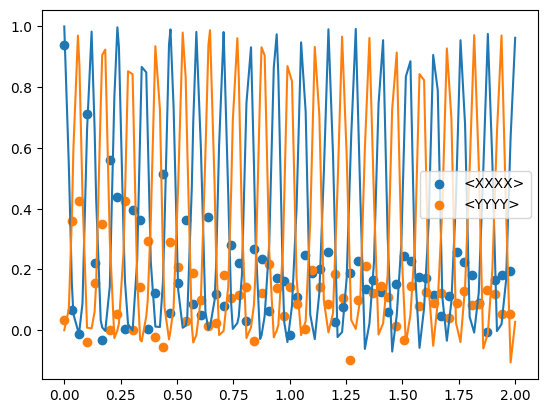

In [15]:
XXXX_comb = np.concatenate((expectations_matrix[:,0], expectations_matrix[:,1]))
YYYY_comb = np.concatenate((expectations_matrix[:,3], expectations_matrix[:,2]))

plt.plot(times_sim, resultsTFIM_XXXX[:,0,0])
plt.plot(times_sim, resultsTFIM_YYYY[:,0,0])
plt.scatter(times_comb, XXXX_comb, label = '<XXXX>')
plt.scatter(times_comb, YYYY_comb, label = '<YYYY>')
plt.legend()

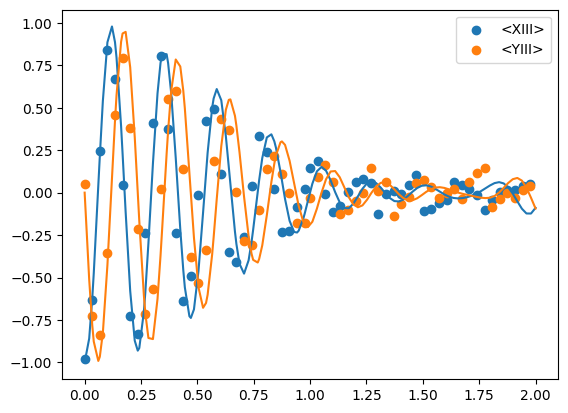

In [16]:
plt.plot(times_sim, resultsTFIM_single_x[:,0,0])
plt.plot(times_sim, resultsTFIM_single_y[:,0,0])
single_comb_x = np.concatenate((qubit_0_magnetization[:,0], qubit_0_magnetization[:,1]))
single_comb_y = np.concatenate((qubit_0_magnetization[:,3], qubit_0_magnetization[:,2]))
#plt.plot(times_sim, resultsTFIM_YYYY[:,0,0])
plt.scatter(times_comb, single_comb_x, label = '<XIII>')
plt.scatter(times_comb, single_comb_y, label = '<YIII>')
plt.legend()